In [1]:
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


digits = datasets.load_digits()

X_digits = pd.DataFrame(digits.data)
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=126)

The K-nearest neighbors (KNN) method is an extremely simple supervised learning method to implement in its most basic form, yet it is often effective for complex classification tasks.
The KNN algorithm does not train on any data, but uses all the available data each time to classify a new data point.


The principle of nearest neighbor methods is to find a predefined number k of nearest training samples in distance from the new point, and to predict the class from them. The class assigned to the new data is the majority class among its K nearest neighbors in terms of a chosen distance. By default, the distance used by the KNeighborsClassifier class is the Euclidean distance.

For example: The figure below illustrates the operation of a 5-NN algorithm. For a new input whose class we want to predict, the algorithm calculates the 5 nearest neighbors of this input and infers the class that constitutes the majority of these neighbors in order to deduce the class of the new point.

The function KNeighborsClassifier from the neighbors package allows creating a KNN classifier by giving it arguments, mainly the number of 'neighbors' n_neighbors chosen, and in metric the distance to use. Among the main metrics, we find the following:

euclidean for the Euclidean distance:  ∑𝑛𝑖=1(𝑥𝑖−𝑦𝑖)2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√
 

manhattan for the Manhattan distance  (𝑥,𝑦)
 :  ∑𝑛𝑖=1|𝑥𝑖−𝑦𝑖|
 

chebyshev for the Chebyshev distance  (𝑥,𝑦)
 :  max𝑖(|𝑥𝑖−𝑦𝑖|)
 

minkowski for the Minkowski distance  (𝑥,𝑦,𝑝)
 :  ∑𝑛𝑖=1(|𝑥𝑖−𝑦𝑖|𝑝)⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√𝑝
 , where  𝑝∈\R
 

seuclidean for the SEuclidean distance  (𝑥,𝑦,𝑉)
 :  ∑((𝑥−𝑦)2𝑉[𝑖])⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√
 , where V is a size n vector of variances for the Seuclidean distance

mahalanobis for the Mahalanobis distance  (𝑥,𝑦,𝑉−1)
 :  (𝑥−𝑦)𝑇𝑉−1(𝑥−𝑦)⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√
 , where  𝑉−1
  is the inverse matrix of the covariance matrix for the Mahalanobis distance

The choice of distance in the kNN method often depends on the data structure and how the proximity between points should be measured based on their specific characteristics. Each distance has its advantages and disadvantages, and the choice will depend on the nature of the problem and the data.

In [3]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [4]:
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])


Classe prédite,0,1,2,3,4,5,6,7,8,9
Classe réelle,,,,,,,,,,
0,32,0,0,0,0,0,0,0,0,0
1,0,54,0,0,0,0,0,0,0,0
2,0,0,38,0,0,0,0,0,0,0
3,0,0,0,28,0,0,0,0,0,0
4,0,0,0,0,41,0,0,0,0,0
5,0,0,0,0,0,40,1,0,0,2
6,0,0,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,27,0,0
8,0,0,0,0,0,0,0,0,34,0


In [6]:
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_m.fit(X_train, y_train)
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])



Classe prédite,0,1,2,3,4,5,6,7,8,9
Classe réelle,,,,,,,,,,
0,32,0,0,0,0,0,0,0,0,0
1,0,54,0,0,0,0,0,0,0,0
2,0,0,38,0,0,0,0,0,0,0
3,0,0,0,28,0,0,0,0,0,0
4,0,0,0,0,41,0,0,0,0,0
5,0,0,0,0,0,40,1,0,0,2
6,0,0,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,27,0,0
8,0,0,0,0,0,0,0,0,34,0


In [7]:
score_minkowski = knn.score(X_test, y_test)

# Score of the model using the Manhattan distance
score_manhattan = knn_m.score(X_test, y_test)

print("Score Minkowski :",score_minkowski)
print("Score Manhattan :",score_manhattan)

Score Minkowski : 0.9805555555555555
Score Manhattan : 0.9861111111111112


Even though it may seem surprising, both distances obtain nearly the same score.


Does this mean that these two distances are equally suitable for our data? Is the choice of k important?  

The best way to answer these questions is to provide a graphical analysis of the model performance by metric, depending on the choice of k.  


In [8]:
score_minko = []
score_man = []
score_cheb = []

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))


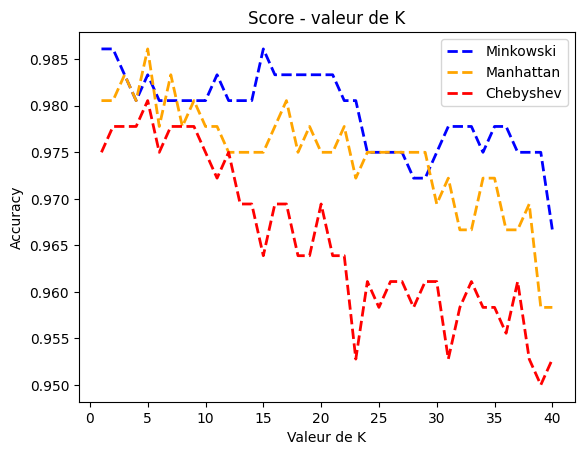

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')  
plt.xlabel('Valeur de K')  
plt.ylabel('Accuracy') 
plt.legend();

The Minkowski and Manhattan distances perform better when k is small (<10). The Minkowski distance appears more stable, and its rate of correct predictions only decreases from k=20 onwards.
The best absolute score is obtained with the Minkowski distance for k=2, 3, or 15.  

However, it is important to note that the test sample is relatively small, and the data sampling gives a significant place to randomness, so these results may vary if the test set is selected differently.     
Thus, it seems more judicious to choose k = 3 which, in addition to obtaining the best score for the Minkowski distance, presents good performances on other norms.